In [1]:
Data_path = '../data_sets/PLAID/'
%pwd
%ls $Data_pathxx

appliances.png                  loads.pyc
conf_matrix1073.png             network.py
conf_matrix321.png              network.pyc
conf_matrix589.png              network_trainer.ipynb
conf_normed_12-14.png           overall_heatmaps.png
data/                           overall_heatmaps_powers.png
data.py                         parse.py
data.pyc                        parse.py~
gnb_plaid_all.pkl               PLAID_Trained_Classifier.ipynb
gnb_plaid_all.pkl_01.npy        README.md
gnb_plaid_all.pkl_02.npy        RealParserYo-Copy1.ipynb
gnb_plaid_all.pkl_03.npy        ros/
gnb_plaid_all.pkl_04.npy        scrape.py
gnb_plaid_all.pkl_05.npy        scrape.pyc
individual_heatmaps.png         soldering_iron.csv
individual_heatmaps_powers.png  Test Loads.ipynb
knap.py                         testLoads.py
knap.pyc                        testLoads.pyc
laptop.csv                      toaster.csv
loads.py


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
csv_path = Data_path + 'CSV/'
csv_files = os.listdir(csv_path)

In [4]:

import subprocess

def read_data_given_id(path,ids,progress=False,last_offset=0):
    '''read data given a list of ids and CSV paths'''
    n = len(ids)
    if n == 0:
        return {}
    else:
        data = {}
        for (i,ist_id) in enumerate(ids, start=1):
            if progress:
                print('%d/%d is being read...'%(i,n))
            if last_offset==0:
                data[ist_id] = np.genfromtxt(path+str(ist_id)+'.csv',
                delimiter=',',names='current,voltage',dtype=(float,float))
            else:
                p=subprocess.Popen(['tail','-'+str(int(offset)),path+
                    str(ist_id)+'.csv'],stdout=subprocess.PIPE)
                data[ist_id] = np.genfromtxt(p.stdout,delimiter=',',
                    names='current,voltage',dtype=(float,float))
        return data



In [5]:
import json

with open(Data_path + 'meta1.json') as data_file:    
    meta1 = json.load(data_file)


meta = [meta1]
meta1[0]

{u'id': u'1',
 u'meta': {u'appliance': {u'brand': u'',
   u'current': u'',
   u'manufacture_year': u'',
   u'model_number': u'',
   u'notes': u'',
   u'voltage': u'',
   u'wattage': u''},
  u'header': {u'collection_time': u'July, 2013',
   u'notes': u'some instances are not well calibrated, meta data are not complete',
   u'sampling_frequency': u'30000Hz'},
  u'instances': {u'length': u'2.00s', u'status': u'off-on'},
  u'location': u'house1',
  u'type': u'Compact Fluorescent Lamp'}}

In [6]:
def clean_meta(ist):
    '''remove '' elements in Meta Data ''' 
    clean_ist = ist.copy()
    for k,v in ist.items():
#         if 
        if len(v) == 0:
            del clean_ist[k]
    return clean_ist
                
def parse_meta(meta):
    '''parse meta data for easy access'''
    M = {}
    for m in meta:
        for app in m:
            M[int(app['id'])] = clean_meta(app['meta'])
    return M
     
Meta = parse_meta(meta)    
Meta[1000]

{u'appliance': {u'brand': u'',
  u'current': u'',
  u'manufacture_year': u'',
  u'model_number': u'',
  u'notes': u'',
  u'voltage': u'',
  u'wattage': u''},
 u'header': {u'collection_time': u'July, 2013',
  u'notes': u'some instances are not well calibrated, meta data are not complete',
  u'sampling_frequency': u'30000Hz'},
 u'instances': {u'length': u'2.00s', u'status': u'off-on'},
 u'location': u'house51',
 u'type': u'Laptop'}

In [7]:
# applinace types of all instances
Types = [x['type'] for x in Meta.values()]
# unique appliance types
unq_type = list(set(Types)) 
unq_type.sort()
print(unq_type)

# appliances
Apps = [x['meta']['type'] for x in meta1]

print('number of total instances: %d' % len(Types))
print('number of unique appliances: %d' % len(Apps))
print('number of unique appliance types: %d' % len(unq_type))

[u'Air Conditioner', u'Compact Fluorescent Lamp', u'Fan', u'Fridge', u'Hairdryer', u'Heater', u'Incandescent Light Bulb', u'Laptop', u'Microwave', u'Vacuum', u'Washing Machine']
number of total instances: 1074
number of unique appliances: 1074
number of unique appliance types: 11


In [8]:
print('%25s\t%8s' % ('Appliance Type','# instances'))
for t in unq_type:
    t_ids = [i for i,j in enumerate(Types) if j == t]
    print('%25s\t%10d' % (t,len(t_ids)))

           Appliance Type	# instances
          Air Conditioner	        66
 Compact Fluorescent Lamp	       175
                      Fan	       115
                   Fridge	        38
                Hairdryer	       156
                   Heater	        35
  Incandescent Light Bulb	       114
                   Laptop	       172
                Microwave	       139
                   Vacuum	        38
          Washing Machine	        26


In [9]:
# get 5 random instances from each type, will take ~ 1min to run
import random

count = 5
num_type = len(unq_type)
fs = 30000

ids_to_draw = {}
t_data = {}
for (ii,t) in enumerate(unq_type):
    t_ids = [i for i,j in enumerate(Types,start=1) if j == t]
    ids_to_draw[t] = random.sample(t_ids, count)
    t_data[t] = read_data_given_id(csv_path, ids_to_draw[t], False)

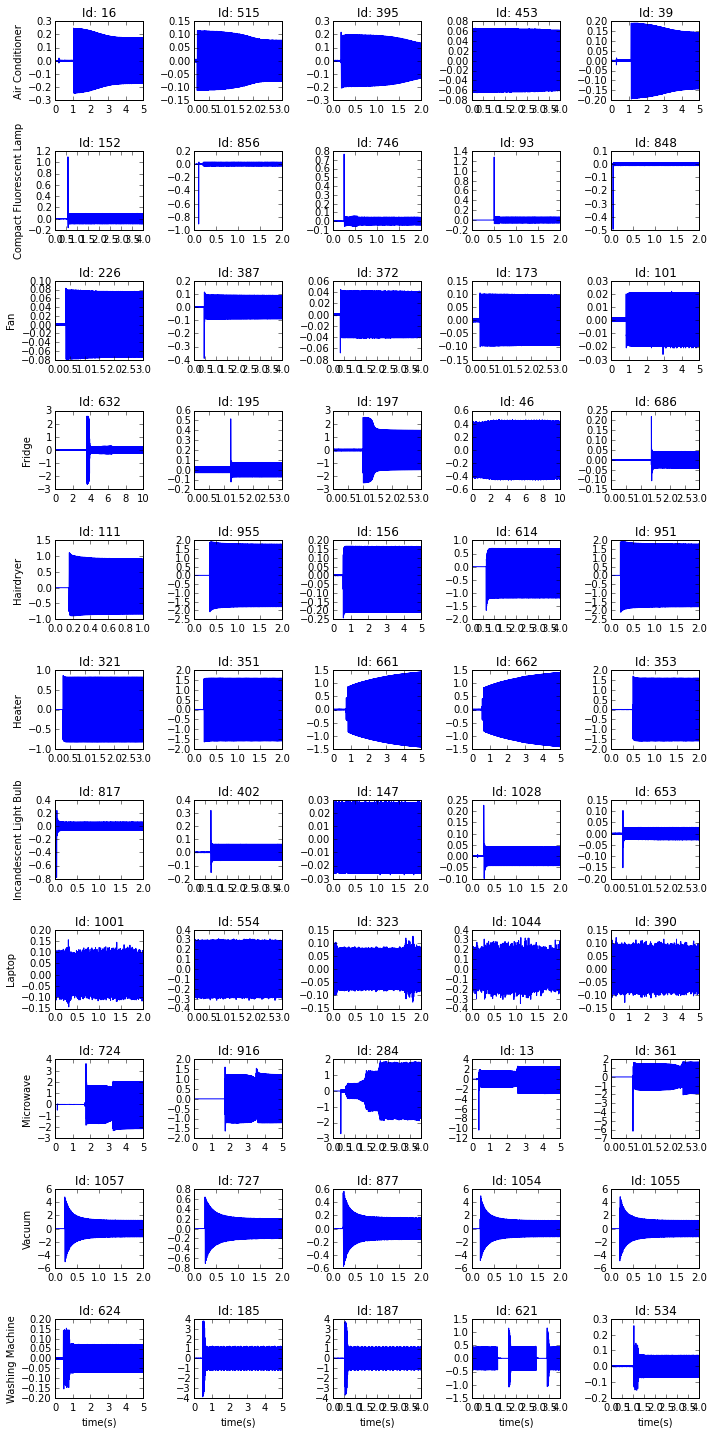

In [10]:
# plot current
fig = plt.figure(figsize=(10,20))
ids_to_draw = {}
for (ii,t) in enumerate(unq_type):
    jj = 0
    for (k,v) in t_data[t].items():
        plt.subplot(num_type,count,ii*count+jj+1)
        plt.plot(np.linspace(1./fs,len(v['current'])/fs,num=len(v['current'])),v['current'])
        #plt.plot(v['current'],v['voltage'])
        if ii==num_type-1:
            plt.xlabel('time(s)')
        if jj==0: 
            plt.ylabel(t,fontsize=10)
        plt.title('Id: '+str(k))
        jj += 1
fig.tight_layout()
plt.show()  

In [11]:
from pybrain.tools.shortcuts import buildNetwork
from pybrain.datasets import SupervisedDataSet, ClassificationDataSet
from pybrain.supervised.trainers import BackpropTrainer
import pandas as pd
import scipy.signal
import mpld3
#mpld3.enable_notebook()
from itertools import chain, izip

numHidden = 3 #number of hidden layers
numOut = 1 #num_type * 2
numInput = 31
onOffShiftParam = 10
onOffWindowSize = 2000
onOffShiftSize = onOffWindowSize / onOffShiftParam
nnWindowSize = 30000 #how many time steps are we looking at. parsing works well at 1-2k inputs and 100-200 for shift
nnShiftSize = nnWindowSize / onOffShiftParam
numOffZeros = 10000
translateParam = 0.1

Unq_type = unq_type + ['None']

on = "On"
off = "Off"
static = ""
onOffTypesList = list(chain.from_iterable(map(lambda t: [t + on, t + off],Unq_type)))
typesDict = dict(zip(Unq_type, range(len(Unq_type))))

#net = buildNetwork(numInput, numHidden, numOut)
ds = ClassificationDataSet(numInput, nb_classes=len(Unq_type), class_labels=Unq_type)
#ds = SupervisedDataSet(numInput, numOut)
#trainer = BackpropTrainer(net, ds)

In [15]:
def makeWindows(base_data):
    data = abs(base_data) ** 2
    #data = base_data / np.linalg.norm(base_data)
    outMean = np.mean(data)
    outStd = np.std(data)
    
    foundCycle = False
    startCycle = -1
    endCycle = -1
    tol = outStd*1.5
    window = 10000
    totalLen = 9 # 9 * 10000 @ 30,000Hz =  3 second window
    
    first_window = np.mean(map(abs,data[-1 * window:]))
    windows = []    
    mins = []
    maxs = []
    for i, _ in list(enumerate(data))[::-1]:
        curr_win = data[i-window:i]
        if i < window:
            continue
        if i % window == 0:
            windows.append(curr_win)
            mins.append(min(curr_win))
            maxs.append(max(curr_win))
            mv_av = np.mean(map(abs,curr_win))
            diff = abs(mv_av-first_window)
            #print mv_av
    sums = map(np.mean,windows[::-1])
    while len(sums) < totalLen:
        if len(sums) > 0:
            sums.append(sums[-1])
            mins.append(mins[-1])
            maxs.append(maxs[-1])
        else:
            sums.append(0.0)
            mins.append(0.0)
            maxs.append(0.0)
    fv =  list(chain.from_iterable([sums[:totalLen], mins[:totalLen], maxs[:totalLen]]))
    return fv

In [16]:
import cmath

def centroid(mags, freqs):
    return np.dot(mags, freqs) / np.sum(mags)
    
def windowToInputFeatures(window):
    featureVector = []
    N = 2
    #fft = np.fft.rfft(window)
    
    fft = np.fft.rfft(window)
    ps = abs(fft) ** 2
    time_step = 1.0 / 30000.0
    freqs = np.fft.rfftfreq(window.shape[-1], time_step)
    #idx = np.argsort(freqs)
    #plt.plot(freqs[idx], ps[idx])

    topNInd = np.argpartition(fft, -1 * N)[-1 * N:]
    topNInd.sort()
    #featureVector.extend(topNFreq)
    topNFreq = freqs[topNInd]
    topNMags = fft[topNInd]
    polars = map(cmath.polar,topNMags)
    p0 = [p[0] for p in polars]
    p1 = [p[1] for p in polars]
    #featureVector.extend( list(chain.from_iterable(sorted(izip(topNFreq, p0, p1), key=lambda x: x[1], reverse=True))))
    featureVector.extend(topNFreq)
    cent = cmath.polar(centroid(fft, freqs))
    featureVector.append(cent[0])
    featureVector.append(cent[1])
    #maxi = np.nanmax(window)
    #mini = np.nanmin(window)
    #featureVector.append(maxi)
    #featureVector.append(mini)
    w = makeWindows(window)
    featureVector.extend(w)
    return featureVector

def inputFeaturesToFullVector(input_features, t, action_type):
    global numOut, numIn, onOffTypesList, typesDict
    final_vec = input_features
    final_vec.append(typesDict[t])
    return final_vec

In [17]:
def parseIntoTurningOnAndStable(base_data):
    totalSeconds = 3
    hz = 30000
    return base_data[:totalSeconds * hz], base_data[totalSeconds * hz:]

In [18]:
ds.clear()
count = 20
training_ids = {}
testing_ids = {}
sets_of_train_ids = {}
sets_of_test_ids= {}
training_data = {}
testing_data = {}
ids_to_draw = {}
sets_of_ids = {}
t_data = {}
training_types = Unq_type
#training_types = [t for t in Unq_type if t != 'Compact Fluorescent Lamp' and t != 'Incandescent Light Bulb' ]
#training_types = {'Microwave', 'Hairdryer'}
#training_types = {'Vacuum', 'Washing Machine', 'Microwave', 'Hairdryer'}
print training_types

app = 0

for (ii,t) in enumerate(training_types):
    print "t: " + str(t)
    app_set = 0
    t_ids = [i for i,j in enumerate(Types,start=1) if j == t]
    training_ids[t] = t_ids
    sets_of_train_ids[t] = [training_ids[t][x:x+count] for x in xrange(0, len(training_ids[t]), count)]
    for train_set in sets_of_train_ids[t]:
        app_set += 1
        print "Appliance Set #" + str(app_set) + " : #" + str(app)
        t_data[t] = read_data_given_id(csv_path, train_set, False)
        for (k,df_v) in t_data[t].items():
            app += 1
            v = df_v['current']
            turningOn, running = parseIntoTurningOnAndStable(v)
            #np.append(running,running)
            #turningOff = np.append(running, np.zeros(len(running)))
            #postRun = np.random.normal(random.uniform(0,0.01),random.uniform(0,0.005),2000)
            
            finalTurningOn = windowToInputFeatures(turningOn)
            ds.addSample(finalTurningOn,typesDict[t])
print "Done"

[u'Air Conditioner', u'Compact Fluorescent Lamp', u'Fan', u'Fridge', u'Hairdryer', u'Heater', u'Incandescent Light Bulb', u'Laptop', u'Microwave', u'Vacuum', u'Washing Machine', 'None']
t: Air Conditioner
Appliance Set #1 : #0
Appliance Set #2 : #20
Appliance Set #3 : #40
Appliance Set #4 : #60
t: Compact Fluorescent Lamp
Appliance Set #1 : #66
Appliance Set #2 : #86
Appliance Set #3 : #106
Appliance Set #4 : #126
Appliance Set #5 : #146
Appliance Set #6 : #166
Appliance Set #7 : #186
Appliance Set #8 : #206
Appliance Set #9 : #226
t: Fan
Appliance Set #1 : #241
Appliance Set #2 : #261
Appliance Set #3 : #281
Appliance Set #4 : #301
Appliance Set #5 : #321
Appliance Set #6 : #341
t: Fridge
Appliance Set #1 : #356
Appliance Set #2 : #376
t: Hairdryer
Appliance Set #1 : #394
Appliance Set #2 : #414
Appliance Set #3 : #434
Appliance Set #4 : #454
Appliance Set #5 : #474
Appliance Set #6 : #494
Appliance Set #7 : #514
Appliance Set #8 : #534
t: Heater
Appliance Set #1 : #550
Appliance Set 

In [36]:
print len(ds.getField('target'))
tstdata, trndata = ds.splitWithProportion( 0.3 )
trndata._convertToOneOfMany( )
tstdata._convertToOneOfMany( )

1074


In [37]:
print "Number of training patterns: ", len(trndata)
print "Number of testing patterns: ", len(tstdata)
print "Input and output dimensions: ", trndata.indim, trndata.outdim
print "First sample (input, target, class):"
print trndata['input'][0], trndata['target'][0], trndata['class'][0]
print trndata['input'][-1], trndata['target'][-1], trndata['class'][-1]
print trndata.calculateStatistics()

Number of training patterns:  752
Number of testing patterns:  322
Input and output dimensions:  31 12
First sample (input, target, class):
[  5.86666667e+01   5.96666667e+01   5.75005648e+03   8.29319817e-01
   3.00000000e-06   3.29120000e-06   3.96160000e-06   1.05251619e-02
   1.18545743e-02   1.17448968e-02   1.15696709e-02   1.13041130e-02
   1.13041130e-02   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   2.49640000e-02   2.56000000e-02
   2.59210000e-02   2.59210000e-02   4.88410000e-02   3.60000000e-05
   2.50000000e-05   3.60000000e-05   3.60000000e-05] [1 0 0 0 0 0 0 0 0 0 0 0] [ 0.]
[  5.90000000e+01   5.93333333e+01   1.06914559e+03   8.23527076e-01
   9.50500000e-07   3.74455050e-03   2.48166300e-03   2.30307940e-03
   2.27940530e-03   2.29391900e-03   2.28067890e-03   2.27963290e-03
   2.27963290e-03   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+0

In [39]:
from itertools import combinations
def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

In [40]:
def plot_confusion_matrix(cm_non, title='Confusion matrix', cmap=plt.cm.Blues):
    global training_types
    cm = cm_non.astype('float') / cm_non.sum(axis=1)[:, np.newaxis]
    types = list(training_types)
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(types))
    plt.xticks(tick_marks,types, rotation=90)
    plt.yticks(tick_marks, types)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig("conf_normed_12-14.png")

             precision    recall  f1-score   support

        0.0       0.71      0.80      0.75        15
        1.0       0.98      0.93      0.95        55
        2.0       1.00      0.76      0.86        49
        3.0       0.29      1.00      0.44         4
        4.0       1.00      0.86      0.92        49
        5.0       0.82      0.90      0.86        10
        6.0       0.92      0.90      0.91        40
        7.0       0.92      1.00      0.96        47
        8.0       1.00      0.98      0.99        41
        9.0       0.85      1.00      0.92        11
       10.0       0.17      1.00      0.29         1

avg / total       0.94      0.90      0.91       322

Accuracy: 0.900621118012


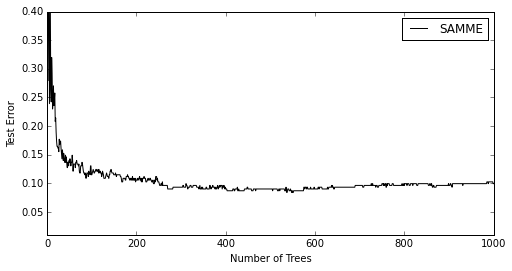

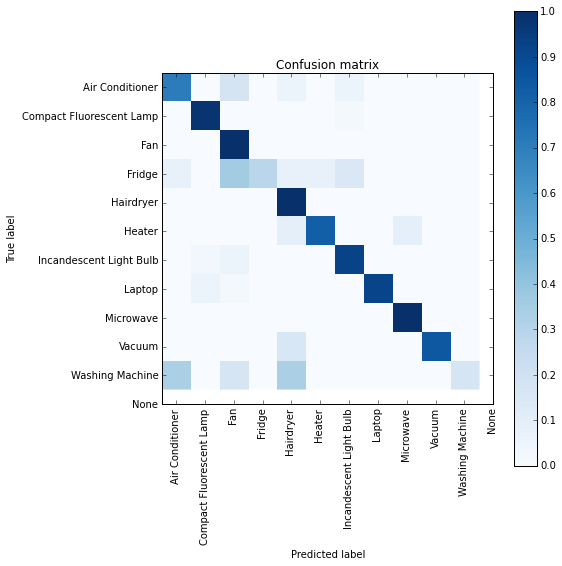

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn import svm, linear_model, metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.externals.six.moves import zip

import matplotlib.pyplot as plt

from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

best_mask = []
X = np.delete(trndata['input'], best_mask, 1)
y = trndata['class']
tstX = np.delete(tstdata['input'], best_mask, 1)
tstY = tstdata['class']
#tstX = X
#tstY = y

clf = DecisionTreeClassifier(random_state=0)

#There 3-4% of randomness for predictions when building the trees. Not sure why, but its okay. 
#for 70/30 train/test split
#max_depth = 2, l_r = 1.5, n_est = 1000 gives 80% accuracy
#max_depth = 3, l_r = 1.5, n_est = 1000 gives 90% accuracy
#max_depth = 4, l_r = 1.5, n_est = 1000 gives 90-92% accuracy
#max_depth = 4, l_r = 1.5, n_est = 700 gives 89% accuracy
#max_depth = 4, l_r = 1.5, n_est = 2000 gives 92% accuracy
#max_depth = 3, l_r = 1.3, n_est = 1000 gives 86% accuracy
#max_depth = 3, l_r = 1.5, n_est = 500 gives 88% accuracy 
#with change to mean power feature vectors accuracy goes down to ~87%

bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=4),
    n_estimators=1000,
    learning_rate=1.5,
    algorithm="SAMME")

bdt_discrete.fit(X, y.ravel())

discrete_test_errors = []

for discrete_train_predict in bdt_discrete.staged_predict(tstX):
    discrete_test_errors.append(
        1. - accuracy_score(discrete_train_predict, tstY))


cls_rpt = classification_report(discrete_train_predict, tstY)
print cls_rpt
right = [1 for i, _ in enumerate(discrete_train_predict) if discrete_train_predict[i] == tstY[i]]
print "Accuracy: " + str(float(sum(right)) / float(len(discrete_train_predict)))

    
n_trees_discrete = len(bdt_discrete)

# Boosting might terminate early, but the following arrays are always
# n_estimators long. We crop them to the actual number of trees here:
discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]


plt.figure(figsize=(8, 4))

plt.plot(range(1, n_trees_discrete + 1),
         discrete_test_errors, c='black', label='SAMME')
plt.legend()
plt.ylim(0.01, 0.4)
plt.ylabel('Test Error')
plt.xlabel('Number of Trees')
plt.show()

cm = confusion_matrix(tstY, discrete_train_predict)
plot_confusion_matrix(cm)



In [44]:
from sklearn import cross_validation
scores = cross_validation.cross_val_score(bdt_discrete,X, y.ravel(), cv=5)
print scores

from sklearn.externals import joblib
joblib.dump(bdt_discrete, 'models/bdt_discrete_plaid_all.pkl') 

#bdt_discrete = joblib.load('svm_plaid_all.pkl') 

[ 0.85620915  0.76973684  0.80263158  0.84        0.84827586]


['models/bdt_discrete_plaid_all.pkl',
 'models/bdt_discrete_plaid_all.pkl_01.npy',
 'models/bdt_discrete_plaid_all.pkl_02.npy',
 'models/bdt_discrete_plaid_all.pkl_03.npy',
 'models/bdt_discrete_plaid_all.pkl_04.npy',
 'models/bdt_discrete_plaid_all.pkl_05.npy',
 'models/bdt_discrete_plaid_all.pkl_06.npy',
 'models/bdt_discrete_plaid_all.pkl_07.npy',
 'models/bdt_discrete_plaid_all.pkl_08.npy',
 'models/bdt_discrete_plaid_all.pkl_09.npy',
 'models/bdt_discrete_plaid_all.pkl_10.npy',
 'models/bdt_discrete_plaid_all.pkl_11.npy',
 'models/bdt_discrete_plaid_all.pkl_12.npy',
 'models/bdt_discrete_plaid_all.pkl_13.npy',
 'models/bdt_discrete_plaid_all.pkl_14.npy',
 'models/bdt_discrete_plaid_all.pkl_15.npy',
 'models/bdt_discrete_plaid_all.pkl_16.npy',
 'models/bdt_discrete_plaid_all.pkl_17.npy',
 'models/bdt_discrete_plaid_all.pkl_18.npy',
 'models/bdt_discrete_plaid_all.pkl_19.npy',
 'models/bdt_discrete_plaid_all.pkl_20.npy',
 'models/bdt_discrete_plaid_all.pkl_21.npy',
 'models/bdt_disc

predictRisingClass : windowOfCurrent $\in \mathbf{R}^n \rightarrow$ (class $\in$ Unq_type, confidenceLevel $\in [0,1]$)

In [49]:
def checkConfidence(model, prediction):
    #predict_log_proba(X)
    #predict_proba(X) -> returns array of probabilites for each class
    return 1.0

def predictRisingClass(window):
            
    turningOn, running = parseIntoTurningOnAndStable(window)
    finalTurningOn = windowToInputFeatures(turningOn)
    
    abt = joblib.load('models/bdt_discrete_plaid_all.pkl') 
    prediction = abt.predict(finalTurningOn)
    probabilities = abt.predict_proba(finalTurningOn)
    #gnb_confidence = checkConfidence(gnb, gnb_prediction)
    return prediction, probabilities#, gnb_confidence


In [50]:
pred, prob = predictRisingClass(np.ones(100000))
print pred, prob

[ 5.] [[ 0.09148132  0.09010327  0.09025633  0.09076595  0.09198356  0.09249763
   0.0901923   0.09030888  0.09068763  0.09062535  0.09109777]]


In [38]:
# basic_data = []
# col_sums = trndata['input'].sum(axis=0)
# norm_trndata = trndata['input']
# print len(norm_trndata[0])
# #norm_trndata =  trndata['input'] / col_sums[np.newaxis, :]
# norm_trndata = pd.DataFrame(trndata['input'])
# norm_trndata = np.log(norm_trndata)
# norm_trndata = pd.concat([norm_trndata.transpose(), pd.DataFrame(trndata['class']).transpose()]).transpose()
# #print norm_trndata
# #print norm_trndata[[0,1,2,3,4,5]]
# cols = [0,1,2,3,4,5]
# basic_data = norm_trndata

# fig = plt.figure( figsize=(8,20))
# curr = 0
# prev_curr = 0
# for i, t in enumerate(training_types):
#     print t
#     curr += len(training_ids[t])
#     if curr == prev_curr:
#         break
#     print curr
#     print
#     sp = fig.add_subplot(len(training_types)+1, 1, i+1)
#     sp.imshow(basic_data[prev_curr:curr], cmap='hot', interpolation='nearest', aspect="auto")
#     sp.set_ylabel(t, rotation=90)
#     sp.set_xticks(np.arange(13))
#     #plot([curr]*len(basic_data[200]), color="black")
#     prev_curr = curr
#     print prev_curr

# #sp2.set_yticks(range(len(training_types)))
# #sp2.set_yticklabels([app for app in unq_type], fontsize=10)
# fig.show()
# fig.savefig("individual_heatmaps_powers.png")

# fig = plt.figure( figsize=(7,12))
# plt.imshow(basic_data, cmap='hot', interpolation='nearest', aspect="auto")
# fig.show()
# fig.savefig("overall_heatmaps_powers.png")
# print
# print "0-1: top 2 freqs"
# print "2-3 centroid polars"
# print "section 1: the current sums of a signal over the first 3 seconds (divided into 9 windows, sum taken over each window)"
# print "section 2: the current minimums of ^ "
# print "section 3: the current sums of ^"
